In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class SimpleCNN_Visual(nn.Module):
    def __init__(self):
        super(SimpleCNN_Visual, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, padding=1)   # → (2, 28, 28)
        self.pool1 = nn.MaxPool2d(2, 2)                          # → (2, 14, 14)

        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, padding=1)   # → (4, 14, 14)
        self.pool2 = nn.MaxPool2d(2, 2)                          # → (4, 7, 7)

        self.fc = nn.Linear(4 * 7 * 7, 10)

    def forward(self, x):
        self.feature1 = F.relu(self.conv1(x))      # Save for visualization
        x = self.pool1(self.feature1)

        self.feature2 = F.relu(self.conv2(x))      # Save for visualization
        x = self.pool2(self.feature2)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
# MNIST 다운로드 및 데이터로더
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=1, shuffle=True)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.97MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:04<00:00, 333kB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


In [6]:
# 모델 및 샘플 입력 준비
model = SimpleCNN_Visual()
sample_data, sample_label = next(iter(train_loader))
output = model(sample_data)

print("모델 출력:", output)

모델 출력: tensor([[ 0.1557,  0.1002, -0.1517, -0.0239,  0.0721,  0.0371,  0.1089, -0.1453,
         -0.0112,  0.1695]], grad_fn=<AddmmBackward0>)


In [7]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, title_prefix):
    num_channels = feature_maps.shape[1]
    plt.figure(figsize=(15, 5))
    for i in range(num_channels):
        plt.subplot(1, num_channels, i+1)
        plt.imshow(feature_maps[0, i].detach().numpy(), cmap='gray')
        plt.title(f'{title_prefix} #{i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

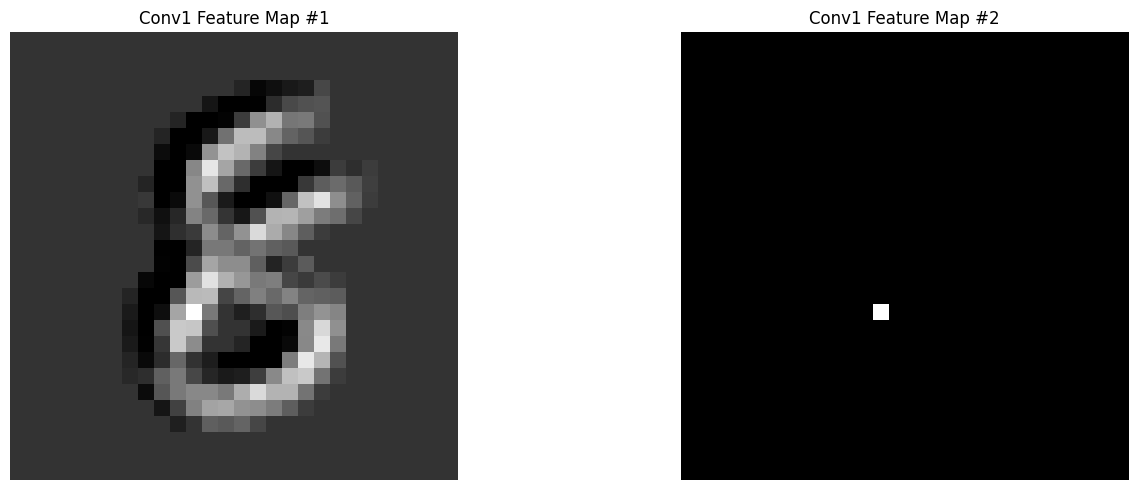

In [8]:
# Conv1 결과 시각화
plot_feature_maps(model.feature1, "Conv1 Feature Map")

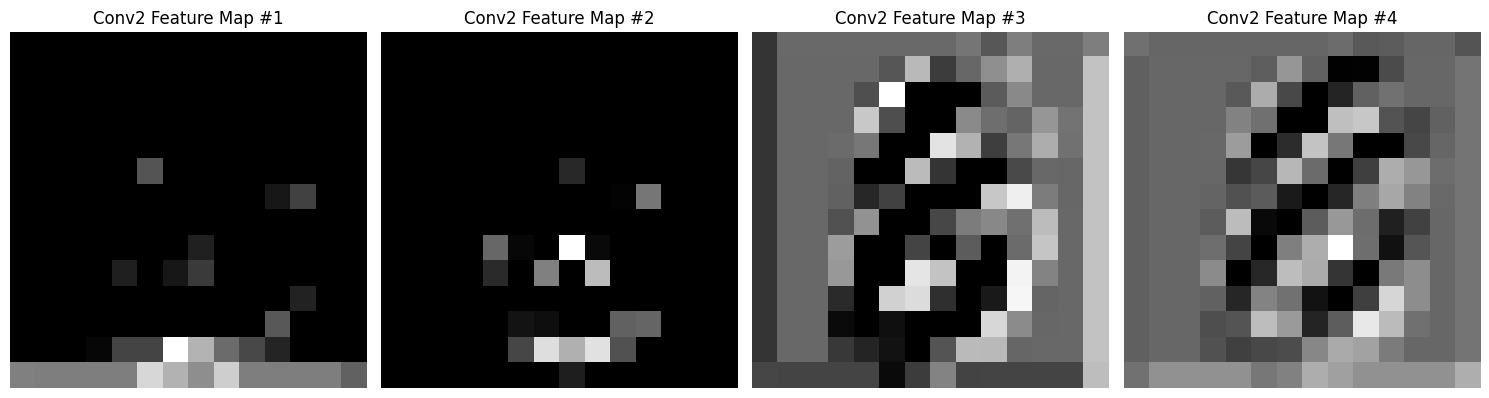

In [9]:
# Conv2 결과 시각화
plot_feature_maps(model.feature2, "Conv2 Feature Map")